# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
254,2023-12-25,17,16,14,87.500000,12.500000,356.2110,hard,2023-12-25
255,2023-12-26,22,21,18,85.714286,14.285714,210.9850,medium,2023-12-26
256,2023-12-27,22,21,16,76.190476,23.809524,179.7620,medium,2023-12-27
257,2023-12-28,27,27,25,92.592593,7.407407,85.4020,easy,2023-12-28


How many people are playing Reflect?

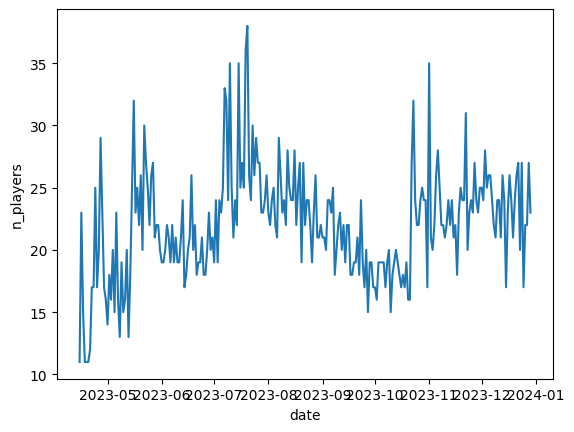

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

582

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2023-12-25,17,16,14,87.500000,12.500000,356.2110,hard,2023-12-25,puzzle-2023-12-25.txt,...,4.166667,6,25,2,0,3,2,8,5,109.7
255,2023-12-26,22,21,18,85.714286,14.285714,210.9850,medium,2023-12-26,puzzle-2023-12-26.txt,...,5.800000,8,29,6,0,4,2,10,5,inf
256,2023-12-27,22,21,16,76.190476,23.809524,179.7620,medium,2023-12-27,puzzle-2023-12-27.txt,...,4.142857,7,29,2,0,3,1,10,5,68.9
257,2023-12-28,27,27,25,92.592593,7.407407,85.4020,easy,2023-12-28,puzzle-2023-12-28.txt,...,6.250000,9,25,4,0,2,1,8,5,65.2


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

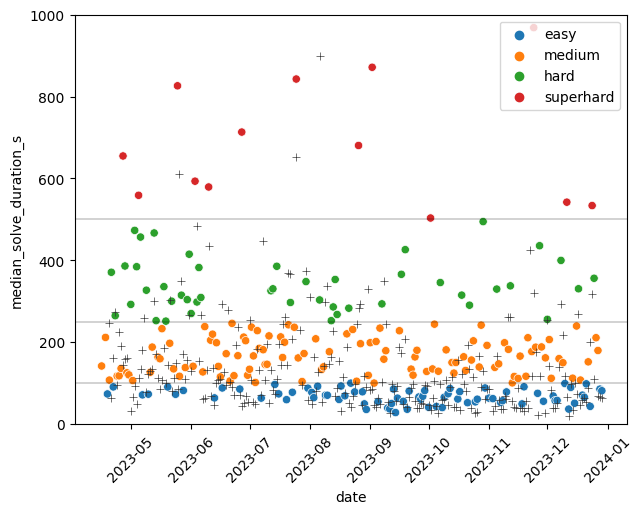

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

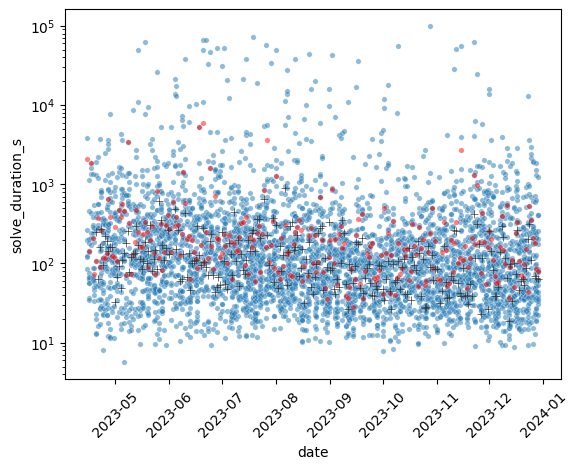

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

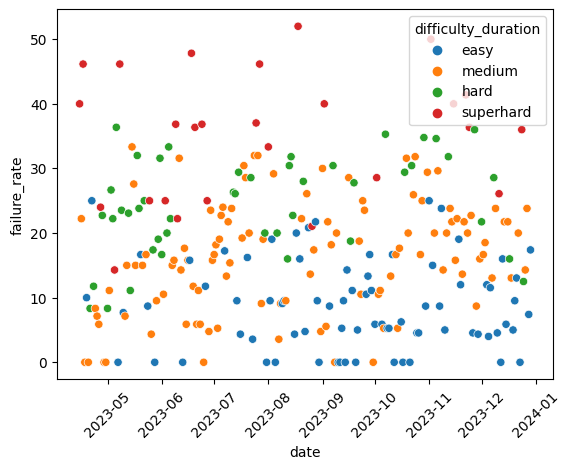

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.527600,0.082179,0.056259,0.109628,0.073043,-0.007247,0.143833,0.017706,0.079891,0.073758,0.088239,-0.032165,0.070635,0.173698,0.140100,0.157232,0.104024
failure_rate,0.527600,1.000000,0.141176,0.100530,0.121386,0.084734,0.048997,0.206888,0.048106,0.102506,0.109236,0.090798,-0.097216,0.142854,0.083170,0.268996,0.191024,0.129964
total_beam_distance,0.173698,0.083170,0.135920,0.079533,0.412305,0.314866,-0.204115,0.125281,0.057546,0.265814,-0.042403,0.395873,0.147499,0.305005,1.000000,0.268134,0.090000,0.010304
excess_reflections,0.157232,0.191024,0.311486,-0.345999,-0.249997,0.553847,0.487170,0.462058,-0.114754,-0.079482,-0.216191,0.361067,0.276607,0.103010,0.090000,0.089743,1.000000,0.776919
max_blocks_per_beam,0.143833,0.206888,0.141308,-0.259769,-0.122795,0.430468,0.311815,1.000000,-0.238205,0.041301,-0.115270,0.327255,0.166717,0.288072,0.125281,0.225511,0.462058,0.077845
excess_beam_distance,0.140100,0.268996,-0.154520,-0.283805,-0.159932,0.263122,0.099693,0.225511,-0.100013,-0.010666,-0.244105,0.280109,0.317410,0.662348,0.268134,1.000000,0.089743,-0.001731
num_beams,0.109628,0.121386,0.012506,0.810643,1.000000,-0.184157,-0.547542,-0.122795,0.221487,0.793815,0.644575,0.199214,-0.814526,-0.190827,0.412305,-0.159932,-0.249997,-0.135422
num_excess_reflection_beams,0.104024,0.129964,0.265850,-0.150501,-0.135422,0.381065,0.427208,0.077845,0.063479,0.055271,0.034224,0.257083,0.097603,-0.096431,0.010304,-0.001731,0.776919,1.000000
num_double_reflect_blocks,0.088239,0.090798,0.155324,0.013961,0.199214,0.718598,0.325198,0.327255,0.311323,0.442478,-0.238268,1.000000,-0.044184,0.144583,0.395873,0.280109,0.361067,0.257083
num_blocks,0.082179,0.141176,1.000000,-0.027797,0.012506,0.526698,0.488086,0.141308,0.489596,-0.192034,-0.020694,0.155324,0.027096,-0.123936,0.135920,-0.154520,0.311486,0.265850


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

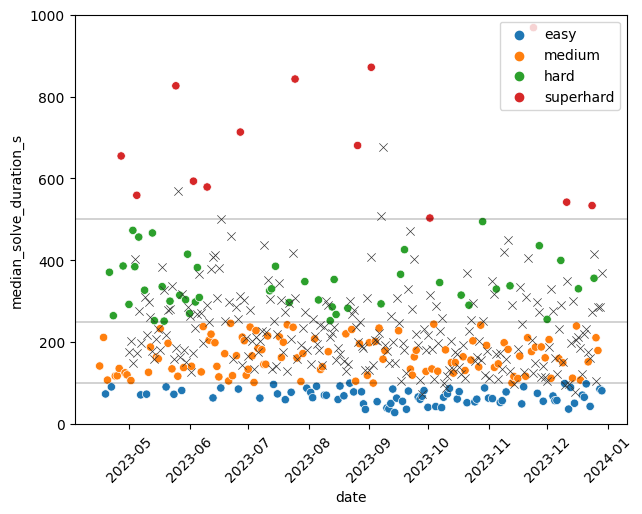

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');